**Note** please use local  runtime by following [this tutorial](https://datasainslab.com/local-runtime-on-google-colab/)


In [0]:
!pip install opencv-python

In [0]:
!pip install Keras

In [0]:
!pip install pywin32==225

In [0]:
!pip install numpy==1.17

In [0]:
!pip install seaborn

In [0]:
import numpy
print(numpy.__version__)

1.17.0


In [0]:
import os
import pandas as pd
from imageio import imread
import math
import numpy as np
import cv2
import keras
import seaborn as sns
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.models import Sequential

In [0]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: ignored

In [0]:


data_dir = os.path.abspath(r'C:\users\administrator\Downloads\GTSRB\Final_Training\Images')
os.path.exists(data_dir)

def resize_cv(im):
    return cv2.resize(im, (64, 64), interpolation = cv2.INTER_LINEAR)

list_images = []
output = []
for dir in os.listdir(data_dir):
    if dir == '.DS_Store' :
        continue
    
    inner_dir = os.path.join(data_dir, dir)
    csv_file = pd.read_csv(os.path.join(inner_dir,"GT-" + dir + '.csv'), sep=';')
    for row in csv_file.iterrows() :
        img_path = os.path.join(inner_dir, row[1].Filename)
        img = imread(img_path)
        img = img[row[1]['Roi.X1']:row[1]['Roi.X2'],row[1]['Roi.Y1']:row[1]['Roi.Y2'],:]
        img = resize_cv(img)
        list_images.append(img)
        output.append(row[1].ClassId)
#print(list_images)
print(len(list_images))

39209


In [0]:
# get test img
import glob as glob
# import os
# from imageio import imread
test_dir = os.path.abspath(r'C:\users\administrator\Downloads\output')
os.path.exists(test_dir)

test_images = []
# PATH_TO_TEST_IMAGES = 'C:\\Users\\Alive\\Downloads\\new\\traffic-sign-detection-master\\test_images'
PATH_TO_TEST_IMAGES = glob.glob(os.path.join(test_dir, '*.ppm'))
for i in PATH_TO_TEST_IMAGES:
    img = imread(i)
    img = resize_cv(img)
    test_images.append(img)
test_images_stack = np.stack(test_images)
print(test_images_stack[:1])
# print("=============================")
# print(test_images)
print(len(test_images_stack))



[[[[127 255 212]
   [127 255 212]
   [127 255 212]
   ...
   [127 255 212]
   [127 255 212]
   [127 255 212]]

  [[127 255 212]
   [127 255 212]
   [127 255 212]
   ...
   [127 255 212]
   [127 255 212]
   [127 255 212]]

  [[127 255 212]
   [127 255 212]
   [127 255 212]
   ...
   [127 255 212]
   [127 255 212]
   [127 255 212]]

  ...

  [[127 255 212]
   [153 205 170]
   [189 132 108]
   ...
   [137  59  45]
   [136  68  50]
   [135  74  52]]

  [[127 255 212]
   [146 186 154]
   [172  88  71]
   ...
   [180 116 108]
   [165 109  98]
   [155 104  91]]

  [[127 255 212]
   [141 175 144]
   [162  61  48]
   ...
   [206 151 147]
   [183 134 128]
   [167 122 115]]]]
6


Train on 27446 samples, validate on 11763 samples
Epoch 1/3
27446/27446 [==============================] - 1011s 37ms/step - loss: 2.2954 - accuracy: 0.3763 - val_loss: 0.6736 - val_accuracy: 0.8089
Epoch 2/3
27446/27446 [==============================] - 1069s 39ms/step - loss: 0.6175 - accuracy: 0.8112 - val_loss: 0.1621 - val_accuracy: 0.9543
Epoch 3/3
27446/27446 [==============================] - 1081s 39ms/step - loss: 0.2567 - accuracy: 0.9245 - val_loss: 0.0769 - val_accuracy: 0.9789
[11 38 39  2  9 40]


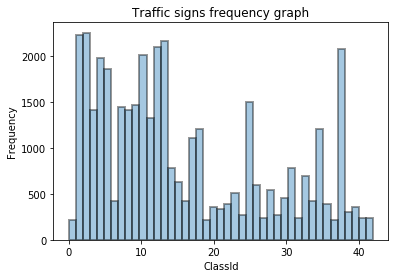

In [0]:

fig = sns.distplot(output, kde=False, bins = 43, hist = True, hist_kws=dict(edgecolor="black", linewidth=2))
fig.set(title = "Traffic signs frequency graph",
        xlabel = "ClassId",
        ylabel = "Frequency")

input_array = np.stack(list_images)
train_y = keras.utils.np_utils.to_categorical(output)

randomize = np.arange(len(input_array))
np.random.shuffle(randomize)
x = input_array[randomize]
y = train_y[randomize]

split_size = int(x.shape[0]*0.7)
train_x, val_x = x[:split_size], x[split_size:]
train1_y, val_y = y[:split_size], y[split_size:]

# split_size = int(val_x.shape[0]*0.5)
# val_x, test_x = val_x[:split_size], val_x[split_size:]
# val_y, test_y = val_y[:split_size], val_y[split_size:]


#the model
hidden_num_units = 2048
hidden_num_units1 = 1024
hidden_num_units2 = 128
output_num_units = 43

epochs = 3
batch_size = 16
pool_size = (2, 2)
input_shape = Input(shape=(32, 32,3))

model = Sequential([

 Conv2D(16, (3, 3), activation='relu', input_shape=(64,64,3), padding='same'),
 BatchNormalization(),

 Conv2D(16, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),
    
 Conv2D(32, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
    
 Conv2D(32, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),
    
 Conv2D(64, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
    
 Conv2D(64, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),

 Flatten(),

 Dense(units=hidden_num_units, activation='relu'),
 Dropout(0.3),
 Dense(units=hidden_num_units1, activation='relu'),
 Dropout(0.3),
 Dense(units=hidden_num_units2, activation='relu'),
 Dropout(0.3),
 Dense(units=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

### Training the model
trained_model_conv = model.fit(train_x.reshape(-1,64,64,3), train1_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))                               

### Prdicting the class
pred = model.predict_classes(test_images_stack)
print(pred)
### Evaluating the model
# model.evaluate(test_x, test_y)

Save model based on [this tutorial](https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/)

In [0]:
import pickle

In [0]:
filename = r'C:\users\administrator\Downloads\finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

test if we have loaded the model sucessfully. 

the expected result is [11 38 39  2  9 40]

In [0]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_pred = loaded_model.predict_classes(test_images_stack)
print(loaded_pred)


[11 38 39  2  9 40]
